## Scaling

***

__Step 1__

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env
import wrangle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
#First acquire and prepare the data
zillow = wrangle.wrangle_zillow()

In [3]:
#Now split into train, validate, and test sets
train, validate, test = wrangle.train_validate_test_split(zillow)
train.shape, validate.shape, test.shape

((1060483, 7), (454493, 7), (378744, 7))

__MinMaxScaler__

In [4]:
#Instantiate the scaler
min_max_scaler = MinMaxScaler()

#Fit the scaler on train data
cols_to_scale = ['bedroom_count', 'bathroom_count', 'area (sq-ft)', 'tax_amount']
min_max_scaler.fit(train[cols_to_scale])

#Transform the data
min_max_train = min_max_scaler.transform(train[cols_to_scale])
min_max_validate = min_max_scaler.transform(validate[cols_to_scale])
min_max_test = min_max_scaler.transform(test[cols_to_scale])

#Assign the scaled columns as new columns in each set
cols_scaled = ['bedroom_count_scaled', 'bathroom_count_scaled', 'area (sq-ft) scaled', 'tax_amount_scaled']
train[cols_scaled] = min_max_train
validate[cols_scaled] = min_max_validate
test[cols_scaled] = min_max_test

In [5]:
def compare_dists(cols_to_scale, cols_scaled):
    plt.figure(figsize=(13,6))

    for i, col in enumerate(cols_to_scale):
        i += 1
        plt.subplot(2,4,i)
        train[col].plot.hist()
        plt.title(col)

    for i, col in enumerate(cols_scaled):
        i += 5
        plt.subplot(2,4,i)
        train[col].plot.hist()
        plt.title(col)

    plt.tight_layout()
    plt.show()

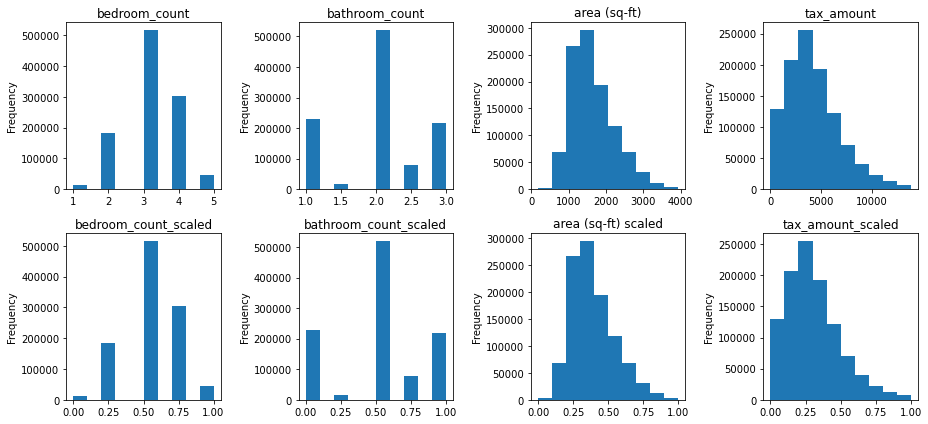

In [6]:
#Visualize distributions of scaled and non-scaled data
compare_dists(cols_to_scale, cols_scaled)

__StandardScaler__

In [7]:
#Instantiate the scaler
standard_scaler = StandardScaler()

#Fit the standard scalar to train data
standard_scaler.fit(train[cols_to_scale])

#Transform the data
standard_train = standard_scaler.transform(train[cols_to_scale])
standard_validate = standard_scaler.transform(validate[cols_to_scale])
standard_test = standard_scaler.transform(test[cols_to_scale])

#Add the scaled data to the train, validate, and test df's
train[cols_scaled] = standard_train
validate[cols_scaled] = standard_validate
test[cols_scaled] = standard_test

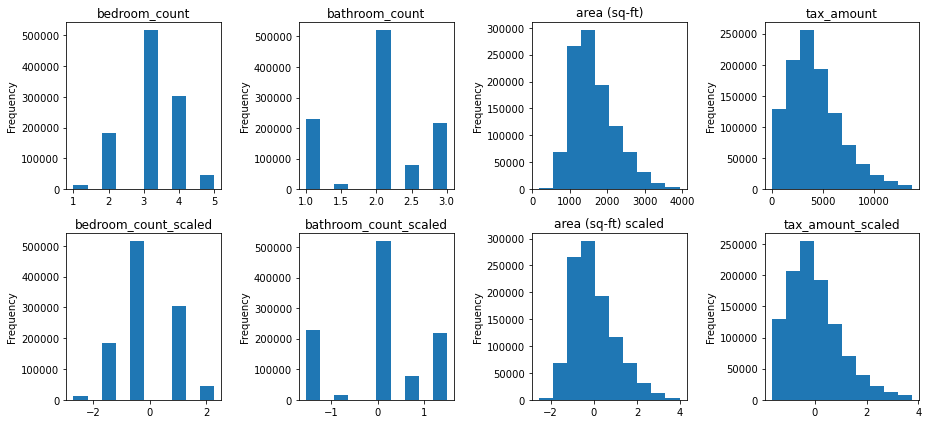

In [8]:
#Visualize distributions of scaled and non-scaled data
compare_dists(cols_to_scale, cols_scaled)

__RobustScaler__

In [9]:
#Instantiate the scaler
robust_scaler = RobustScaler()

#Fit the scaler on train
robust_scaler.fit(train[cols_to_scale])

#Transform the data
robust_train = robust_scaler.transform(train[cols_to_scale])
robust_validate = robust_scaler.transform(validate[cols_to_scale])
robust_test = robust_scaler.transform(test[cols_to_scale])

#Add scaled values to train, validate, test data frames
train[cols_scaled] = robust_train
validate[cols_scaled] = robust_validate
test[cols_scaled] = robust_test

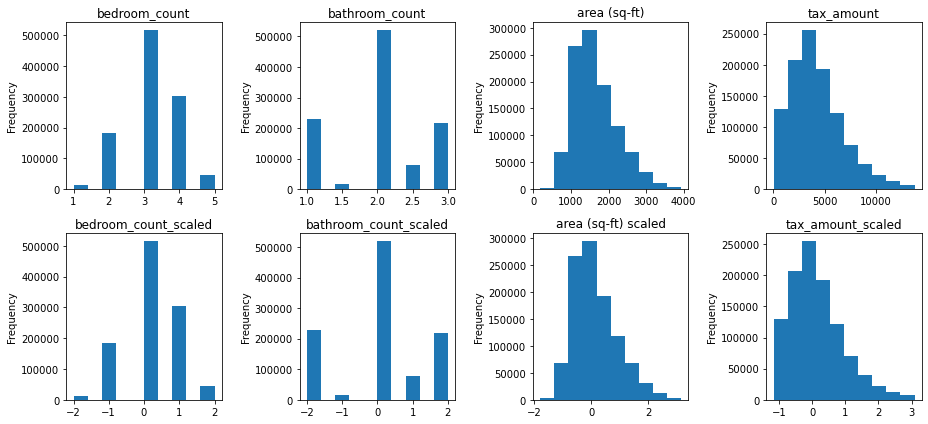

In [10]:
#Visualize distributions of scaled and non-scaled data
compare_dists(cols_to_scale, cols_scaled)

__Step 2__

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [11]:
pd.DataFrame(robust_scaler.inverse_transform(robust_train))

,0,1,2,3
0,3.0,1.0,1176.0,540.29
1,3.0,1.0,1236.0,3671.92
2,4.0,3.0,2335.0,6615.08
3,3.0,3.0,2768.0,13635.57
4,4.0,3.0,2111.0,8394.39
...,...,...,...,...
1060478,2.0,1.5,998.0,6163.98
1060479,3.0,2.0,1920.0,1061.14
1060480,3.0,2.0,1734.0,3878.96
1060481,5.0,3.0,2432.0,3884.25


In [12]:
train[cols_to_scale]

,bedroom_count,bathroom_count,area (sq-ft),tax_amount
273196,3,1.0,1176,540.29
1141708,3,1.0,1236,3671.92
1034310,4,3.0,2335,6615.08
533655,3,3.0,2768,13635.57
901392,4,3.0,2111,8394.39
...,...,...,...,...
1698528,2,1.5,998,6163.98
406919,3,2.0,1920,1061.14
1729210,3,2.0,1734,3878.96
405307,5,3.0,2432,3884.25


The data is the exact same as the original, but the indices have been changed. Also, the data type of each was changed to float.

***

__Step 3__

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [13]:
from sklearn.preprocessing import QuantileTransformer

In [14]:
#Instantiate the scaler
quantile_scaler = QuantileTransformer(output_distribution = 'normal')

#Fit the scaler on train data
quantile_scaler.fit(train[cols_to_scale])

#Transform the data
train[cols_scaled] = quantile_scaler.transform(train[cols_to_scale])
validate[cols_scaled] = quantile_scaler.transform(validate[cols_to_scale])
test[cols_scaled] = quantile_scaler.transform(test[cols_to_scale])

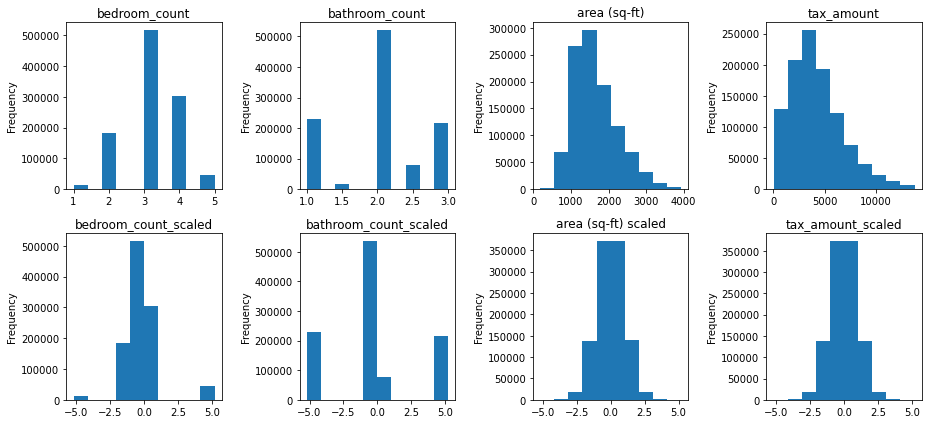

In [15]:
compare_dists(cols_to_scale, cols_scaled)

The distributions are definitely different than the originals. You can tell that the scaler is trying to force them into normal distributions.

__Step 4__

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [16]:
#Instantiate the scaler
quantile_scaler = QuantileTransformer()

#Fit the scaler on train data
quantile_scaler.fit(train[cols_to_scale])

#Transform the data
train[cols_scaled] = quantile_scaler.transform(train[cols_to_scale])
validate[cols_scaled] = quantile_scaler.transform(validate[cols_to_scale])
test[cols_scaled] = quantile_scaler.transform(test[cols_to_scale])

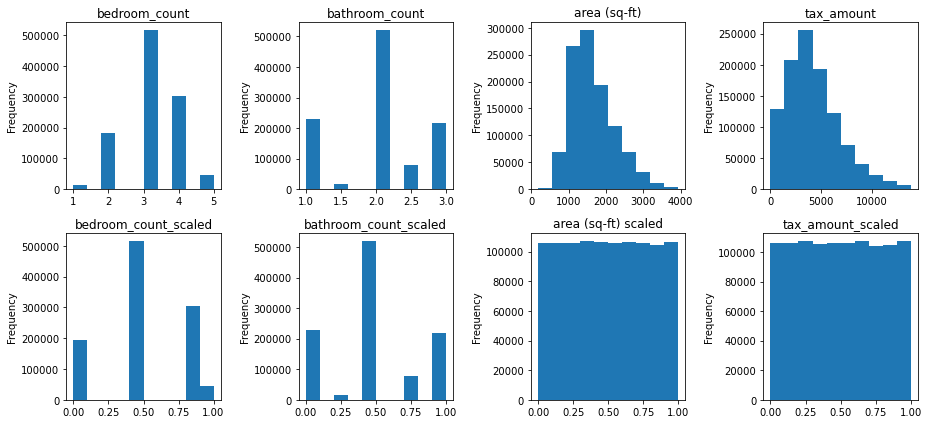

In [17]:
compare_dists(cols_to_scale, cols_scaled)

Again, the scaled distributions are definitely different than the originals, except for bathroom_count and bedroom_count. Those seem pretty similar. However, the last two are very much different and have uniform distribution.

__Step 5__

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

Since I don't fully understand the non-linear scalers, I will not use any of those. Instead, I will use the Robust Scaler since it is less sensitive to any outliers that may exist in the data.

In [18]:
#Testing
import prepare

In [19]:
#Reset zillow data
zillow = wrangle.wrangle_zillow()

In [20]:
#Split the data into train, validate, test sets
train, validate, test = wrangle.train_validate_test_split(zillow)

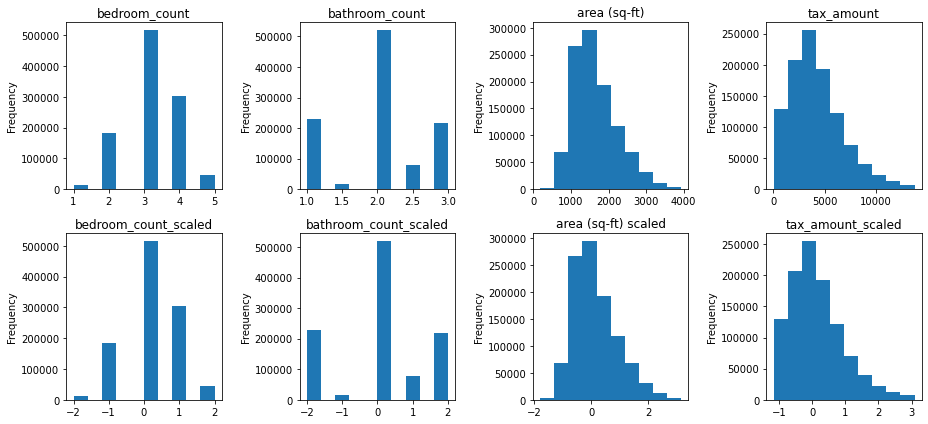

In [21]:
#Scale the data
train, validate, test = prepare.scale_zillow_data(train, validate, test)

In [22]:
train.head()

,tax_value,year_built,fips,bedroom_count_scaled,bathroom_count_scaled,area (sq-ft) scaled,tax_amount_scaled
273196,37850,1922.0,6037.0,0.0,-2.0,-0.483487,-1.000414
1141708,315835,1953.0,6111.0,0.0,-2.0,-0.404227,-0.033267
1034310,567000,1988.0,6111.0,1.0,2.0,1.047556,0.875674
533655,1200000,2002.0,6037.0,0.0,2.0,1.619551,3.043823
901392,685293,1976.0,6037.0,1.0,2.0,0.751651,1.425181


In [23]:
#Testing successful. Data Scaled.